<a href="https://colab.research.google.com/github/hyunshoon/stock_information/blob/main/CrawlingAndNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
!pip install konlpy
!apt-get update -qq
!apt-get install fonts-nanum* -qq #한글 폰트
!pip install wordcloud

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 51.9 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanu

In [4]:
import time, re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from konlpy.tag import Kkma  
from konlpy.tag import Hannanum
from konlpy.tag import Okt  
import requests
import webbrowser
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from datetime import datetime

In [5]:
def today_date():
    now = datetime.now()
    return str(now.year) + str(now.month) + str(now.day)

In [14]:
okt = Okt()  
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'#font_path
path_oss = "/content/drive/MyDrive/Colab Notebooks/OSS"#본인 구글 드라이브 상황에 맞게 설정
font_name = fm.FontProperties(fname=path, size=10).get_name()
date = '20211220'#해당 날짜에 선정된 종목 선택

# 선정된 종목들 View(blog,cafe), influencer, news, dart글 크롤링 하여 텍스트 파일로 정리

In [15]:
#선정된 종목들
today = pd.read_csv(f'{path_oss}/data/{date}_stock.csv')
name_list = list(today['name'])
code_list = list(today['code'])

In [16]:
name_list

['카카오',
 '한전기술',
 '코스맥스',
 '한글과컴퓨터',
 '제테마',
 '이수앱지스',
 '이지케어텍',
 '한컴MDS',
 '씨티케이',
 '포인트엔지니어링',
 '큐로컴',
 '오르비텍',
 '초록뱀컴퍼니',
 '코스맥스비티아이',
 '에프엔씨엔터',
 '에스엔유',
 '위세아이텍',
 '지엔원에너지',
 '메이슨캐피탈',
 '일승',
 '녹십자홀딩스2우']

In [17]:
def urlToList_news_dart(url):
  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  li = [i.text for i in soup.find_all("a", class_ = 'tit')]
  return li

In [18]:
def urlTOList_influencer(url):
  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  text_list = [i.text for i in soup.find_all("a", class_ = 'name_link')]#text 가져오기
  links = soup.find_all("a", class_ = 'name_link')#링크 가져오기
  link_list = []
  for link in links:
    link_list.append(link['href'])
  return zip(text_list, link_list)

In [19]:
def urlTOList_view(url):
  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  text_list = [i.text for i in soup.find_all("a", class_ = 'api_txt_lines total_tit _cross_trigger')]#text 가져오기
  links = soup.find_all("a", class_ = 'api_txt_lines total_tit _cross_trigger')#링크 가져오기
  link_list = []
  for link in links:
    link_list.append(link['href'])
  return zip(text_list, link_list)

In [20]:
def crawling_to_txt():
  with open(f'{path_oss}/data/{date}stock_contents.txt', 'w')as f:
    for i in range(0,len(name_list)):
      #view,influencer, 네이버뉴스, 네이버공시정보
      urls = [(f'https://search.naver.com/search.naver?where=view&sm=tab_jum&query={name_list[i]}','view'),
            (f'https://search.naver.com/search.naver?where=influencer&sm=tab_jum&query={name_list[i]}','influencer'),
            (f'https://finance.naver.com/item/news_news.naver?code={code_list[i]}&page=&sm=title_entity_id.basic&clusterId=','news'),
            (f'https://finance.naver.com/item/news_notice.naver?code={code_list[i]}&page=','dart')]
      f.write(f'==================={name_list[i]}===================\n')
      for url in urls:
        if url[1]=='view':
          f.write("======View======\n")
          lines = urlTOList_view(url[0])
          for line in lines:
            f.write(f'{line[0]},  Link: {line[1]}\n')
        if url[1]=='influencer':
          f.write("======Influencer======\n")
          lines = urlTOList_influencer(url[0])
          for line in lines:
            f.write(f'{line[0]},  Link: {line[1]}\n')
        if url[1]=='news':
          f.write("======News======\n")
          lines = urlToList_news_dart(url[0])
          for line in lines:
            f.write(f'{line}\n')
        if url[1]=='dart':
          f.write("======Dart======\n")
          lines = urlToList_news_dart(url[0])
          for line in lines:
            f.write(f'{line}\n')
      print(f'{name_list[i]} 수집 완료')

In [61]:
crawling_to_txt()#크롤링 실행

카카오 수집 완료
한전기술 수집 완료
코스맥스 수집 완료
한글과컴퓨터 수집 완료
제테마 수집 완료
이수앱지스 수집 완료
이지케어텍 수집 완료
한컴MDS 수집 완료
씨티케이 수집 완료
포인트엔지니어링 수집 완료
큐로컴 수집 완료
오르비텍 수집 완료
초록뱀컴퍼니 수집 완료
코스맥스비티아이 수집 완료
에프엔씨엔터 수집 완료
에스엔유 수집 완료
위세아이텍 수집 완료
지엔원에너지 수집 완료
메이슨캐피탈 수집 완료
일승 수집 완료
녹십자홀딩스2우 수집 완료


# 종목별 키워드 수집, 정리

In [22]:
def make_keyword(name_list, code_list):
  word_list = []
  for i in range(0,len(name_list)):
    #view,influencer, 네이버뉴스, 네이버공시정보
    urls = [(f'https://search.naver.com/search.naver?where=view&sm=tab_jum&query={name_list[i]}','view'),
          (f'https://search.naver.com/search.naver?where=influencer&sm=tab_jum&query={name_list[i]}','influencer'),
          (f'https://finance.naver.com/item/news_news.naver?code={code_list[i]}&page=&sm=title_entity_id.basic&clusterId=','news'),
          (f'https://finance.naver.com/item/news_notice.naver?code={code_list[i]}&page=','dart')]
    term_list = []
    for url in urls:
      if url[1]=='view':
        lines = urlTOList_view(url[0])
      if url[1]=='influencer':
        lines = urlTOList_influencer(url[0])
      if url[1]=='news':
        lines = urlToList_news_dart(url[0])
      term_list += [okt.nouns(line[0]) for line in lines]
    term_flatten = sum(term_list, [])
    word_list.append(term_flatten)
    print(f'{name_list[i]}완료')
  return pd.DataFrame([word_list], columns=name_list)

In [23]:
def word_visual(df):
  for i in range(len(df.columns)):
    counter = Counter(df.iloc[0,i])
    dict_top = dict(counter.most_common(n=15))
    try:
      del dict_top[df.columns[i]]#해당 종목 이름 제거
    except KeyError:
      pass
    wc = WordCloud(font_path=path, relative_scaling=0.2,background_color='white').generate_from_frequencies(dict_top)
    plt.imshow(wc)
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/OSS/{df.columns[i]}.png')


In [66]:
# word_visual(word_df)

# 전체 종목 TF-IDF Matrix 생성

In [24]:
stock_list = pd.read_csv(f"{path_oss}/data/stock_list.csv", encoding='CP949')
stock_list

,id,ticker,name,marketCap
0,0,005930,삼성전자,4465397
1,1,000660,SK하이닉스,869962
2,2,035420,NAVER,648840
3,3,005935,삼성전자우,563677
4,4,207940,삼성바이오로직스,561740
...,...,...,...,...
2466,2466,001527,동양2우B,43
2467,2467,000547,흥국화재2우B,40
2468,2468,032685,소프트센우,40
2469,2469,009275,신원우,36


In [68]:
#전체 종목 키워드 수집 후 저장
# total_word_df = make_keyword(list(stock_list['name']), list(stock_list['ticker']))
# total_word_df.to_csv(f'{path_oss}/data/total_stock_words.csv', encoding='utf-8-sig')
# total_word_df

In [25]:
#저장한 total_word 파일 읽기
total_word_df = pd.read_csv(f'{path_oss}/data/total_stock_words.csv',index_col = 0,encoding='utf-8-sig')
total_word_df

,삼성전자,SK하이닉스,NAVER,삼성전자우,삼성바이오로직스,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,크래프톤,POSCO,KB금융,카카오페이,현대모비스,SK텔레콤,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,LG,삼성전기,삼성생명,셀트리온헬스케어,하나금융지주,두산중공업,HMM,삼성에스디에스,에코프로비엠,포스코케미칼,KT&G,SK아이이테크놀로지,...,태양금속우,교보9호스팩,현대비앤지스틸우,깨끗한나라우,CJ씨푸드1우,상상인이안제2호스팩,대원전선우,제이웨이,이베스트스팩5호,크라운해태홀딩스우,하이트진로홀딩스우,동부건설우,IBKS제16호스팩,코리아써키트2우B,노루홀딩스우,금강공업우,루트로닉3우C,신영스팩5호,에스디시스템,지스마트글로벌,유진스팩6호,남선알미우,IBKS제12호스팩,이베스트이안스팩1호,케이프이에스제4호,대호특수강우,흥국화재우,JW중외제약우,유유제약2우B,JW중외제약2우B,성문전자우,KG동부제철우,진흥기업우B,동양우,진흥기업2우B,동양2우B,흥국화재2우B,소프트센우,신원우,동양3우B
0,"['전자', '주가', '배당금', '투자', '주식', '월세', '만들기', '...","['스퀘어', '주가', '스터디', '하이닉스', '신축', '빌라', '하이닉스...","['기업', '분석', '단기', '투자', '손익', '현황', '반등', '티'...","['전자', '전자', '주가', '전망', '주의', '사항', '딸아이', '투...","['바이오', '직스', '바이오', '사이언스', '백신', '호재', '상승',...","['카카오', '페이', '상', '실패', '및', '매도', '후기', '시가총...","['손절', '고민', '삼성', '전자', '현대차', '화학', '녹십자', '...","['기업', '분석', '삼성', '장기', '투자', '손익', '현황', '에코...","['현대', '자동차', '주가', '전망', '현대차', '배당금', '및', '...","['기아', '쏘렌토', '하이브리드', '당장', '기아', '승기', '기아',...","['카카오', '뱅크', '주가', '넷마블', '분', '전량', '매도', '카...","['추락', '것', '날개', '셀트리온', '주가', '셀트리온', '그룹', ...","['기업', '분석', '크래프톤', '성수동', '부동산', '정보', '이마트'...","['물', '분할', '지주회사', '전환', '증시', '뉴스', '인', '포스...","['금융', '은행', '기업', '분석', '금융', '은행', '주', '관련'...","['카카오', '페이', '상', '실패', '및', '매도', '후기', '시가총...","['현대', '모비스', '채용', '하반기', '신입사원', '모집', '경영',...","['배당', '투자', '수익', '현황', '쌍용', '배당', '텔레콤', '분...","['삼성', '물산', '주가', '사업', '분야', '실적', '배당금', '건...","['전자', '오브', '제', '김치냉장고', '역시', '전자', '퓨리', '...","['주', '유', '소', '이노베이션', '물', '통과', '물', '분할',...","['신한지주', '주식', '매월', '원', '매수', '주가', '배당금', '...","['바이오', '직스', '바이오', '사이언스', '백신', '호재', '상승',...","['배당', '투자', '수익', '현황', '쌍용', '배당', '텔레콤', '분...","['과', '생활', '건강', '주가', '폭락', '미국', '주식', '투자'...","['어디', '내', '생각', '임', '엔씨소프트', '폭락', '엔씨소프트',...","['수지구청', '역', '롯데', '캐슬', '하이브', '아파트', '청약', ...","['한국전력', '공사', '채용', '공기업', '강의', '준비', '주식시장'...","['인치', '울트라', '기어', '게이', '밍', '모니터', '보상', '판...","['단기', '투자', '손익', '현황', '삼성', '전기', '삼성', '전기...","['삼성', '생명', '주가', '토스', '업무', '협약', '삼성', '생명...","['셀트리온', '주가', '및', '셀트리온', '헬', '스케', '셀트리온',...","['금리', '인상', '혜주', '은행', '주', '금융', '하나', '금융'...","['두산', '중공업', '에너지', '대란', '원전', '관련', '주로', '...","['흠', '녀석', '과', '생활', '건강', '주가', '폭락', '미국',...","['기업', '분석', '삼성', '에스', '디', '에스', '내', '종목',...","['장주', '에코', '프로비', '엠', '주식', '주가', '전망', '실적...","['관련', '주', '재', '기업', '주가', '희비', '명', '포스코',...","['공시', '원금', '이유', '바로', '번호', '이동', '아이폰', '가...","['특징', '주', '정리', '엔켐주', '엔씨소프트', '아이', '테크놀로지...",...,"['태양', '금속', '연속', '상한', '상한', '제도', '시행', '역사...","['교보', '스팩', '교보', '호스', '팩', '모주', '청약', '공모'...","['증시', '리뷰', '주차', '대비', '앤지', '스틸', '제주', '은행...","['시간', '외', '상승', '종목', '라우', '큐어', '펩트론', '흥국...","['밀', '키트', '주식', '간편식', '관련', '코로나', '간편식', '...","['상상', '안제', '호스', '팩', '유지', '전망', '상상', '이안'...","['코스피', '코스닥', '주간', '주가', '상승', '하락', '탑', '건...","['주식', '일기', '주식', '거래', '정지', '이야기', '제이', '웨...","['스팩', '신규', '상장', '베스트', '스팩', '호', '시초', '고가...","['윤석열', '관련', '주', '덕성', '덕', '성우', '서연', '능률'...","['하이트진로', '홀딩스', '이건', '산업', '엘', '엠에스', '아사히맥...","['오늘', '상한', '상승', '하락', '이유', '부건', '신라', '에스...","['제', '호스', '팩', '청약', '및', '상장', '일', '스팩주', ...","['코리아', '키트', '주가', '실적', '발표', '목표', '주가', '전...","['노루', '홀딩스', '차', '랠리', '주식', '유레카', '윤석열', '...","['금강', '공업', '상한', '최재형', '관련', '주', '최재형', '엠...","['루트', '닉', '주가', '전망', '분석', '알젠', '우선주', '루트...","['스팩', '투자', '스팩', '호', '관리종목', '지정', '우려', '종...","['자율', '주행', '왜', '아이', '시스템', '링크', '제니', '시스...","['스토어', '상장', '예비', '심사', '청구', '스퀘어', '가상', '...","['스팩주', '주식', '투자', '새', '열풍', '삼성', '스팩', '호'...","['이낙연', '관련', '주', '범양', '건영', '남선', '알', '삼부'...","['장', '상', '승률', '상위', '장마', '감후', '시간', '외', ...","['스팩', '주식', '정리', '유진', '스팩', '호', '유진', '스팩'...","['주식', '황정리', '피플', '바이오', '캐리', '소프트', '엔진', ...","['대호', '특수', '강우', '주식', '전망', '생각', '부건', '선우...","['주가', '예감', '우선

In [31]:
#전체 종목 corpus 생성
def make_corpus():
  corpus = []
  total_voca = []#단어 빈도 확인용
  for stock in range(len(total_word_df.columns)):
    words = ''
    cleaned = total_word_df.iloc[0,stock].replace("'",'').replace(' ','').replace('[','').replace(']','').split(',')
    for word in cleaned:
      words = words+' '+word
      total_voca.append(word)
    corpus.append(words)
  return corpus, total_voca

In [34]:
corpus, total_voca = make_corpus()

In [35]:
#빈도수 상위 200종목중에서 선정
stop_words = ['주','관련','주가','주식','전망','분석','종목','투자','및',
             '에스','한국','기업','매매','텍','청약','모주','홀딩스','오늘','아이',
             '제','등','스','에이','티','일지','코','케이','디','사업',
             '특징','정보','이유','황','호','비','관심','일정','일','후기','앤','소식','채용','외','에프','에이치','위','이',
             '엠','피','방법','매수','매도','젠','리','이슈','알','우리','공부','장주','팩',
              '수익','유','메','더','삼','호스','현','신','씨','수','인','역','확인','가격','프로',
              '리포트','곳','그룹','진','용','기','중','주목','트','솔','기대','거래','보고서','세','기준','것','결정',
              '삼성', '현대', '카카오', ''
              ]

In [36]:
#빈도 리스트 보며 stop_words에 추가
counter = Counter(total_voca)#빈도 측정
top_words = counter.most_common(n=200)
top_words[:50]

[('주', 34101),
 ('관련', 27720),
 ('주가', 26120),
 ('주식', 15620),
 ('전망', 11468),
 ('분석', 9108),
 ('종목', 8982),
 ('바이오', 7359),
 ('투자', 7294),
 ('및', 6756),
 ('에스', 5994),
 ('한국', 5247),
 ('정리', 5127),
 ('기업', 4925),
 ('매매', 4839),
 ('상한', 4618),
 ('텍', 4422),
 ('실적', 4086),
 ('청약', 4048),
 ('산업', 4015),
 ('삼성', 3807),
 ('테크', 3728),
 ('모주', 3690),
 ('홀딩스', 3667),
 ('오늘', 3633),
 ('전자', 3587),
 ('아이', 3514),
 ('국내', 3456),
 ('상장', 3432),
 ('현대', 3389),
 ('제', 3324),
 ('등', 3241),
 ('추천', 3194),
 ('상승', 3035),
 ('반도체', 3009),
 ('스', 2981),
 ('제약', 2974),
 ('에이', 2916),
 ('티', 2883),
 ('일지', 2878),
 ('배당', 2828),
 ('증권', 2780),
 ('배당금', 2731),
 ('건설', 2633),
 ('코', 2585),
 ('케이', 2474),
 ('차트', 2414),
 ('급등', 2414),
 ('디', 2304),
 ('사업', 2288)]

In [37]:
tfidfv = TfidfVectorizer(stop_words=stop_words).fit(corpus)
tfidf_matrix = tfidfv.transform(corpus).toarray()
print(tfidf_matrix)
print(tfidf_matrix.shape)
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2471, 26193)
{'전자': 18748, '배당금': 8468, '월세': 16346, '만들기': 6558, '누가': 3602, '얼마나': 14569, '사고': 10195, '세계': 11373, '개미': 518, '평택': 23765, '고덕': 1076, '파이브': 23346, '정문': 18948, '상가': 10641, '오피스텔': 15570, '코스피': 21894, '반도체': 8164, '의견': 16986, '인사': 17606, '제도': 19135, '개편': 570, '시장': 12884, '전원': 18736, '한참': 24783, '가전': 163, '체험': 20852, '구매': 1762, '이제': 17393, '메타': 6926, '버스': 8666, '스토어': 12553, '도입': 4621, '손절': 11771, '고민': 1115, '현대차': 25273, '화학': 25716, '녹십자': 3519, '대형주': 4305, '다시': 3812, '가나': 22, '손실': 11759, '회복': 25879, '사랑': 10232, '하나': 24455, '갤럭시': 586, '후속작': 25973, '개봉': 529, '윈도우': 16514, '탑재': 22492, '무용': 7398, '노트북': 3492, '추천': 21110, '최소한': 21010, '지식': 19993, '부자': 9433, '당신': 4053, '장기': 18247, '경험': 984, '목표': 7241, '하락': 24486, '삼전': 10609, '지금': 19910, '업계': 14589, '만화경': 6595, '노조탄압': 3476,

# word_matrix, word cloud


In [38]:
# from wordcloud.wordcloud import STOPWORDS
word_matrix = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=tfidfv.get_feature_names_out())
word_matrix['stock_name'] = stock_list['name']
word_matrix.set_index('stock_name', inplace=True)
# word_matrix.to_csv(f'{path_oss}/data/word_matrix_remove_stopwords.csv',  encoding='utf-8-sig')
print(word_matrix.shape)
word_matrix

(2471, 26193)


,가가,가거도,가게,가격담합,가격표,가결,가경,가경동,가계,가계부,가계부채,가계약,가고일,가공,가공비,가공업,가관,가구,가구점,가기,가까이,가끔,가나,가능,가능도,가능물량,가능성,가다랑어,가닥,가덕도,가도,가동,가두리,가드,가드닝,가득,가든,가디,가디건,가디스,...,히알루론,히알루론산,히어로,히어로즈,히오스,히오스섬,히카리,히타치,히터,히트,히팅진,히팅펌,히피,히피펌,힉콕,힌스,힌지,힌트,힐러,힐리,힐릭스,힐링,힐스,힐스테이트,힐즈,힐튼,힘껏,힘빡주,힘스,힘좀,힘펠,힙스백,힙쓰,힙업,힙지,힙하,힙한데,힙해,힛취이,힛트쏭
stock_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
삼성전자,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043056,0.0,0.0,0.0,0.025853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NAVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
삼성전자우,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
삼성바이오로직스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.015524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
동양2우B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
흥국화재2우B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
소프트센우,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


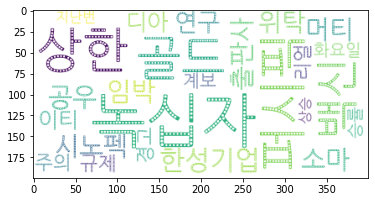

In [39]:
def matrix_select_wordcloud(name_list):
  for name in name_list:
    try:
      dict_top = dict(word_matrix.loc[name].sort_values(ascending = False)[:25]*100)
      del dict_top[name]#해당 종목 이름 제거
    except KeyError:pass
    wc = WordCloud(font_path=path, relative_scaling=0.2,background_color='white').generate_from_frequencies(dict_top)
    plt.imshow(wc)
    plt.savefig(f'{path_oss}/data/png/{name}_tfidf_remove_stopwords.png')
matrix_select_wordcloud(name_list)

# 코사인 유사도

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(tfidf_matrix , tfidf_matrix)
print(cosine_matrix)
print(cosine_matrix.shape)

[[1.         0.08035161 0.07820194 ... 0.01639707 0.0080616  0.04375749]
 [0.08035161 1.         0.0448444  ... 0.01291234 0.00525162 0.00936376]
 [0.07820194 0.0448444  1.         ... 0.04259191 0.00407896 0.01565233]
 ...
 [0.01639707 0.01291234 0.04259191 ... 1.         0.07385122 0.06390814]
 [0.0080616  0.00525162 0.00407896 ... 0.07385122 1.         0.13226307]
 [0.04375749 0.00936376 0.01565233 ... 0.06390814 0.13226307 1.        ]]
(2471, 2471)


In [41]:
cosine_df = pd.DataFrame(cosine_matrix,columns=stock_list.name)
cosine_df['index'] = stock_list.name
cosine_df.set_index('index', inplace=True)
# cosine_df.to_csv(f'{path_oss}/data/cosine_similirity.csv', encoding='utf-8-sig')
cosine_df

name,삼성전자,SK하이닉스,NAVER,삼성전자우,삼성바이오로직스,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,크래프톤,POSCO,KB금융,카카오페이,현대모비스,SK텔레콤,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,LG,삼성전기,삼성생명,셀트리온헬스케어,하나금융지주,두산중공업,HMM,삼성에스디에스,에코프로비엠,포스코케미칼,KT&G,SK아이이테크놀로지,...,태양금속우,교보9호스팩,현대비앤지스틸우,깨끗한나라우,CJ씨푸드1우,상상인이안제2호스팩,대원전선우,제이웨이,이베스트스팩5호,크라운해태홀딩스우,하이트진로홀딩스우,동부건설우,IBKS제16호스팩,코리아써키트2우B,노루홀딩스우,금강공업우,루트로닉3우C,신영스팩5호,에스디시스템,지스마트글로벌,유진스팩6호,남선알미우,IBKS제12호스팩,이베스트이안스팩1호,케이프이에스제4호,대호특수강우,흥국화재우,JW중외제약우,유유제약2우B,JW중외제약2우B,성문전자우,KG동부제철우,진흥기업우B,동양우,진흥기업2우B,동양2우B,흥국화재2우B,소프트센우,신원우,동양3우B
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
삼성전자,1.000000,0.080352,0.078202,0.637607,0.030389,0.053068,0.087670,0.041740,0.102156,0.010907,0.022346,0.020390,0.012505,0.075954,0.056508,0.011866,0.035406,0.042771,0.031451,0.543581,0.027085,0.056691,0.009840,0.057634,0.009081,0.011110,0.060610,0.017388,0.106182,0.061215,0.007312,0.015724,0.023927,0.007187,0.036174,0.071011,0.007271,0.016844,0.023344,0.014782,...,0.018077,0.006304,0.011784,0.016854,0.024208,0.008591,0.029148,0.011445,0.010155,0.015130,0.020215,0.033849,0.007565,0.081167,0.024371,0.005080,0.011975,0.015690,0.038383,0.011937,0.028060,0.003884,0.028000,0.006116,0.004872,0.053170,0.014070,0.011617,0.025857,0.008259,0.380214,0.037540,0.014016,0.005783,0.039865,0.021833,0.031175,0.016397,0.008062,0.043757
SK하이닉스,0.080352,1.000000,0.044844,0.127265,0.027699,0.011236,0.016251,0.018034,0.012107,0.005732,0.010936,0.008195,0.004634,0.018539,0.014358,0.004743,0.013268,0.027570,0.008344,0.063704,0.007395,0.014319,0.045187,0.289210,0.009591,0.005551,0.005959,0.008032,0.017464,0.035079,0.005195,0.009143,0.006451,0.002813,0.019318,0.016548,0.003575,0.009609,0.006411,0.007622,...,0.005262,0.005666,0.014071,0.006080,0.007381,0.006426,0.006353,0.004913,0.003831,0.005402,0.005298,0.012469,0.007889,0.020910,0.004299,0.014560,0.004672,0.003955,0.015949,0.008573,0.005565,0.005313,0.009679,0.005909,0.008314,0.008990,0.007590,0.001545,0.008540,0.000953,0.049144,0.018084,0.007313,0.003916,0.008843,0.007101,0.007954,0.012912,0.005252,0.009364
NAVER,0.078202,0.044844,1.000000,0.101737,0.022443,0.055696,0.055609,0.039158,0.014853,0.006750,0.022900,0.016922,0.116133,0.027582,0.123415,0.041019,0.019333,0.015482,0.035136,0.085988,0.042646,0.027617,0.015106,0.027194,0.064678,0.075237,0.054948,0.021644,0.041324,0.021369,0.009009,0.007370,0.059028,0.038388,0.028799,0.068363,0.020604,0.014883,0.011571,0.020283,...,0.006074,0.002027,0.020249,0.010579,0.005448,0.008124,0.015169,0.021699,0.011328,0.007355,0.015381,0.017741,0.006623,0.027268,0.005209,0.006400,0.005162,0.011897,0.035510,0.033894,0.009846,0.007766,0.021107,0.012689,0.003454,0.010840,0.014125,0.005947,0.005898,0.005949,0.059480,0.012814,0.010580,0.006143,0.015829,0.013265,0.010365,0.042592,0.004079,0.015652
삼성전자우,0.637607,0.127265,0.101737,1.000000,0.057376,0.031082,0.111283,0.029861,0.081222,0.009022,0.021960,0.021290,0.009948,0.074630,0.092380,0.008147,0.023012,0.035384,0.027887,0.553357,0.024964,0.081849,0.024241,0.058206,0.029735,0.007877,0.015931,0.019125,0.072312,0.055181,0.010351,0.021244,0.034264,0.007189,0.039911,0.086140,0.009815,0.013056,0.012245,0.016142,...,0.026680,0.013058,0.015393,0.034535,0.056774,0.012373,0.053553,0.010049,0.033718,0.024989,0.035292,0.093194,0.007292,0.119508,0.042745,0.019134,0.043057,0.014815,0.037824,0.005863,0.018913,0.017267,0.051037,0.006440,0.010131,0.079689,0.065050,0.017287,0.051835,0.032285,0.480831,0.095863,0.034987,0.021223,0.127098,0.099181,0.060484,0.031182,0.025669,0.107300
삼성바이오로직스,0.030389,0.027699,0.022443,0.057376,1.000000,0.013323,0.031291,0.027188,0.022303,0.005478,0.004997,0.102869,0.006481,0.022854,0.008790,0.020602,0.006978,0.048690,0.014523,0.032802,0.010026,0.009393,0.320657,0.087342,0.006523,0.003580,0.005572,0.007683,0.008859,0.014924,0.002724,0.053528,0.002798,0.014346,0.013627,0.021822,0.023493,0.009634,0.003763,0.005123,...,0.006447,0.010984,0.009671,0.045839,0.012277,0.002798,0.015894,0.007470

In [42]:
cosine_df['고려아연'].sort_values(ascending=False)[:10]

index
고려아연           1.000000
LS ELECTRIC    0.162026
영풍             0.132034
티에이치엔          0.120453
이구산업           0.117850
풍산             0.115029
영풍정밀           0.110734
엘컴텍            0.107776
풍산홀딩스          0.106870
엠케이전자          0.105414
Name: 고려아연, dtype: float64

In [43]:
cosine_df['휴마시스'].sort_values(ascending=False)[:10]

index
휴마시스      1.000000
수젠텍       0.535554
랩지노믹스     0.483718
엑세스바이오    0.470640
씨젠        0.459487
EDGC      0.398633
피에이치씨     0.332321
나노엔텍      0.300867
코리아써키트    0.290686
에스디시스템    0.260949
Name: 휴마시스, dtype: float64

In [44]:
cosine_df['넷게임즈'].sort_values(ascending=False)[:10]

index
넷게임즈         1.000000
넥슨지티         0.675123
SNK          0.326684
엠에프엠코리아      0.180443
코이즈          0.177070
넵튠           0.171391
크래프톤         0.146245
카카오게임즈       0.139739
에이프로젠 MED    0.139631
한주케미칼앤홀딩스    0.133329
Name: 넷게임즈, dtype: float64

In [46]:
cosine_df['카카오'].sort_values(ascending=False)[:20]

index
카카오      1.000000
카카오페이    0.526289
카카오뱅크    0.475527
세틀뱅크     0.268478
DSR      0.244228
다날       0.179839
제주은행     0.166047
피코그램     0.162027
리드코프     0.161284
한국캐피탈    0.159474
인포뱅크     0.130018
대신증권     0.119435
큐라클      0.104309
지아이텍     0.102063
라온시큐어    0.096269
지니너스     0.094991
KB금융     0.091704
넷마블      0.091209
KD       0.090695
한화생명     0.090131
Name: 카카오, dtype: float64

# 유사도 높은 종목 추천

In [47]:
def find_similar_stocks(name_list):
  similar_stocks = cosine_df[name_list]
  df = pd.DataFrame()
  for name in name_list:
    df[f'{name}'] = similar_stocks[name].sort_values(ascending=False)[1:21].index
    df[f'{name}_value'] = similar_stocks[name].sort_values(ascending=False)[1:21].values
  return df


In [48]:
find_df = find_similar_stocks(name_list)
find_df.to_csv(f'{path_oss}/data/find_similar_stocks.csv', encoding='utf-8-sig')
find_df

,카카오,카카오_value,한전기술,한전기술_value,코스맥스,코스맥스_value,한글과컴퓨터,한글과컴퓨터_value,제테마,제테마_value,이수앱지스,이수앱지스_value,이지케어텍,이지케어텍_value,한컴MDS,한컴MDS_value,씨티케이,씨티케이_value,포인트엔지니어링,포인트엔지니어링_value,큐로컴,큐로컴_value,오르비텍,오르비텍_value,초록뱀컴퍼니,초록뱀컴퍼니_value,코스맥스비티아이,코스맥스비티아이_value,에프엔씨엔터,에프엔씨엔터_value,에스엔유,에스엔유_value,위세아이텍,위세아이텍_value,지엔원에너지,지엔원에너지_value,메이슨캐피탈,메이슨캐피탈_value,일승,일승_value,녹십자홀딩스2우,녹십자홀딩스2우_value
0,카카오페이,0.526289,한전산업,0.684310,코스맥스비티아이,0.791878,NHN벅스,0.463206,휴젤,0.170776,이화전기,0.437793,케어젠,0.708237,한컴위드,0.603484,씨티씨바이오,0.737086,주성엔지니어링,0.685123,지엔코,0.440834,비에이치아이,0.553820,초록뱀미디어,0.433693,코스맥스,0.791878,삼영이엔씨,0.789475,메디포스트,0.197200,아이텍,0.888436,지엔코,0.561493,한국캐피탈,0.498207,SK5호스팩,0.075712,녹십자홀딩스,0.859209
1,카카오뱅크,0.475527,비에이치아이,0.637594,코스맥스엔비티,0.637865,CBI,0.431436,애머릿지,0.163148,파나진,0.378350,유비케어,0.588180,한컴라이프케어,0.480199,케이씨티,0.640288,참엔지니어링,0.664366,지엔원에너지,0.418828,한전산업,0.404799,컴퍼니케이,0.409779,코스맥스엔비티,0.592676,지엔씨에너지,0.623957,휴럼,0.160928,마인즈랩,0.118005,에스에너지,0.444544,큐캐피탈,0.495093,STX중공업,0.073688,녹십자엠에스,0.704937
2,세틀뱅크,0.268478,보성파워텍,0.490961,코스온,0.593887,인트로메딕,0.425490,국보,0.154548,이아이디,0.367892,케어랩스,0.471213,씨이랩,0.343296,케이씨에스,0.306398,삼성엔지니어링,0.653189,큐로홀딩스,0.260648,보성파워텍,0.377642,NHN벅스,0.372422,코스온,0.535727,에이블씨엔씨,0.620910,고바이오랩,0.135414,엑셈,0.093474,큐로컴,0.418828,리드코프,0.130501,SK6호스팩,0.073223,녹십자,0.702738
3,DSR,0.244228,한신기계,0.392402,CSA 코스믹,0.543353,NHN,0.361083,휴온스글로벌,0.142369,바이넥스,0.311380,한컴라이프케어,0.393814,선익시스템,0.277557,효성오앤비,0.190768,탑엔지니어링,0.615678,우정바이오,0.142876,한전기술,0.357431,스카이이앤엠,0.368323,CSA 코스믹,0.497220,엑사이엔씨,0.533329,대한뉴팜,0.129452,와이더플래닛,0.088571,SGC에너지,0.417467,나우IB,0.119385,대우조선해양,0.069745,녹십자웰빙,0.532137
4,다날,0.179839,두산중공업,0.384758,맥스트,0.508419,다날,0.321214,파마리서치,0.138904,휴메딕스,0.278017,인피니트헬스케어,0.288752,APS홀딩스,0.274787,스카이이앤엠,0.176719,지앤비에스엔지니어링,0.472337,큐캐피탈,0.128701,에너토크,0.322379,한국앤컴퍼니,0.351204,맥스트,0.464267,DL이앤씨우,0.215549,녹십자,0.124580,삼영에스앤씨,0.064781,지엔씨에너지,0.416074,큐로컴,0.088943,삼성중공업,0.066233,지씨셀,0.326339
5,제주은행,0.166047,일진파워,0.378437,엔케이맥스,0.462692,초록뱀컴퍼니,0.291309,디와이디대양,0.129755,휴온스글로벌,0.200989,솔본,0.175262,엔피,0.239980,한국화장품제조,0.147587,에쓰씨엔지니어링,0.398829,아이진,0.127928,한전KPS,0.305371,인트로메딕,0.335401,유티아이,0.435802,큐브엔터,0.151930,영진약품,0.119891,에이트원,0.064432,SNT에너지,0.401464,비투엔,0.084542,디지틀조선,0.065413,OQP,0.213128
6,피코그램,0.162027,오르비텍,0.357431,한국콜마,0.364546,스카이이앤엠,0.260392,우림피티에스,0.128884,이트론,0.157642,원티드랩,0.163561,큐에스아이,0.221222,동구바이오제약,0.147293,이삭엔지니어링,0.362254,차백신연구소,0.118374,한신기계,0.296351,CBI,0.328474,엔케이맥스,0.417767,JYP Ent.,0.128526,알티캐스트,0.100119,씨이랩,0.061552,SH에너지화학,0.359483,옵티팜,0.081100,현대미포조선,0.063506,휴먼엔,0.183013
7,리드코프,0.161284,한전KPS,0.332821,한국화장품제조,0.359397,초록뱀미디어,0.206423,클래시스,0.121844,중앙백신,0.150476,피에이치씨,0.162859,YG PLUS,0.210058,로지시스,0.141399,도화엔지니어링,0.341368,팜젠사이언스,0.117535,HRS,0.291917,미래컴퍼니,0.327826,코스메카코리아,0.310278,YG PLUS,0.112752,녹십자웰빙,0.091456,지아이텍,0.061494,현대에너지솔루션,0.344042,아우딘퓨쳐스,0.070646,케이비제19호스팩,0.061607,골드퍼시픽,0.169060
8,한국캐피탈,0.159474,서전기전,0.314225,한국화장품,0.346038,한컴MDS,0.195052,파크시스템스,0.111214,이큐셀,0.146898,비트컴퓨터,0.153760,코세스,0.204067,코오롱플라스틱,0.129499,GST,0.239912,디엔에이링크,0.115041,두산중공업,0.280180,NHN,0.306775,코맥스,0.307997,글로벌에스엠,0.102776,쎌바이오텍,0.078701,큐라클,0.059362,대성에너지,0.240228,마니커에프앤지,0.062829,세진중공업,0.060752,쎌마테라퓨틱스,0.141949
9,인포뱅크,0.130018,HRS,0.290841,코맥스,0.337261,한국컴퓨터,0.167525,영흥,0.102738,종근당바이오,0.146832,휴럼,0.150689,에이트원,0.200436,에코플라스틱,0.122854,서울반도체,0.181958,씨씨에스,0.114704,서전기전,0.239394,브레인즈컴퍼니,0.298373,대아티아이,0.301830,DL우,0.090184,KD,0.075211,에프앤가이드,0.058659,LG,0.199746,제이웨이,0.062679,케이엔더블유,0.060039,와이오엠,0.140922


In [84]:
sample_df = cosine_df.iloc[:1000,:1000]
mat = np.matrix(sample_df)
sample_df

name,삼성전자,SK하이닉스,NAVER,삼성전자우,삼성바이오로직스,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,크래프톤,POSCO,KB금융,카카오페이,현대모비스,SK텔레콤,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,LG,삼성전기,삼성생명,셀트리온헬스케어,하나금융지주,두산중공업,HMM,삼성에스디에스,에코프로비엠,포스코케미칼,KT&G,SK아이이테크놀로지,...,한컴라이프케어,그린케미칼,예스티,에디슨EV,와이지-원,휴온스블러썸,수젠텍,동아화성,드림시큐리티,사조산업,삼영전자,캔서롭,NE능률,대성에너지,엔비티,예스코홀딩스,유니테크노,동구바이오제약,팜스코,플래티어,상신이디피,피에이치에이,시노펙스,삼목에스폼,포인트모바일,동성제약,제로투세븐,텔레칩스,에스제이그룹,이노뎁,미투온,푸드나무,코세스,FSN,진양홀딩스,경보제약,도이치모터스,룽투코리아,제우스,신라교역
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
삼성전자,1.000000,0.094281,0.091032,0.640166,0.052255,0.037483,0.109710,0.372618,0.105512,0.009246,0.018222,0.021594,0.010575,0.080173,0.056888,0.012352,0.027095,0.040099,0.228182,0.489370,0.048770,0.057861,0.018318,0.048856,0.007698,0.009418,0.055096,0.031753,0.103833,0.313844,0.178319,0.013329,0.023373,0.006091,0.048532,0.474762,0.009615,0.021605,0.030705,0.021371,...,0.003902,0.005100,0.052311,0.015523,0.027362,0.007703,0.009966,0.003209,0.020987,0.014429,0.387314,0.007369,0.001403,0.003240,0.012424,0.023092,0.027329,0.009722,0.004504,0.005889,0.032541,0.020247,0.006723,0.013791,0.013577,0.013641,0.010413,0.046776,0.013455,0.030330,0.011229,0.005326,0.040056,0.036693,0.038130,0.001727,0.008079,0.014575,0.008641,0.004180
SK하이닉스,0.094281,1.000000,0.046846,0.134899,0.030187,0.008675,0.019628,0.046195,0.014833,0.005795,0.009029,0.008675,0.004617,0.020299,0.015126,0.004354,0.016041,0.027971,0.027318,0.066471,0.009963,0.015280,0.046048,0.288842,0.009579,0.005544,0.006298,0.009745,0.018728,0.055299,0.021263,0.009132,0.006795,0.002809,0.021801,0.050346,0.003892,0.010279,0.007420,0.008523,...,0.004348,0.002565,0.072890,0.009303,0.007718,0.008509,0.007814,0.002748,0.004813,0.004753,0.067756,0.004539,0.004749,0.001803,0.020067,0.005439,0.008075,0.007819,0.008742,0.018051,0.008481,0.017495,0.005907,0.014598,0.004984,0.003534,0.001835,0.041067,0.003826,0.007273,0.002211,0.002827,0.011372,0.017974,0.005756,0.004442,0.010167,0.006456,0.003455,0.002673
NAVER,0.091032,0.046846,1.000000,0.108949,0.028081,0.136334,0.062784,0.061197,0.018303,0.006812,0.101528,0.017296,0.124175,0.032312,0.136216,0.109200,0.028109,0.015813,0.051683,0.094779,0.048047,0.029562,0.017724,0.026895,0.063966,0.074409,0.056081,0.023205,0.042109,0.042571,0.024552,0.007289,0.058780,0.040792,0.031763,0.077454,0.020689,0.016765,0.014492,0.026038,...,0.010111,0.008882,0.012903,0.015831,0.077372,0.015150,0.004149,0.009785,0.034263,0.029105,0.074853,0.005653,0.006566,0.003780,0.049011,0.005297,0.047327,0.018530,0.018554,0.030805,0.012388,0.029258,0.010058,0.022590,0.018011,0.005827,0.013190,0.011997,0.011396,0.043022,0.027870,0.012611,0.055513,0.071632,0.012887,0.004903,0.005857,0.023029,0.006320,0.006950
삼성전자우,0.640166,0.134899,0.108949,1.000000,0.066797,0.024218,0.122946,0.160633,0.089461,0.009015,0.018395,0.022769,0.009697,0.080075,0.093467,0.008252,0.031904,0.036327,0.108022,0.551620,0.035150,0.084052,0.027652,0.056871,0.029052,0.007696,0.017046,0.025853,0.076145,0.153639,0.079003,0.020756,0.034888,0.007022,0.048609,0.222460,0.010964,0.015673,0.016309,0.019543,...,0.005816,0.008853,0.048677,0.016393,0.014141,0.012748,0.006281,0.007206,0.018457,0.011263,0.491722,0.004043,0.001914,0.006332,0.010175,0.038975,0.014310,0.014435,0.006890,0.006512,0.017876,0.024723,0.007254,0.015799,0.009469,0.013961,0.007795,0.038926,0.014412,0.017201,0.039273,0.006715,0.022857,0.037782,0.054260,0.004651,0.003967,0.005660,0.002297,0.004284
삼성바이오로직스,0.052255,0.030187,0.028081,0.066797,1.000000,0.026834,0.035412,0.053465,0.024975,0.005540,0.018715,0.103194,0.008121,0.025136,0.012025,0.030665,0.010921,0.049052,0.033207,0.036910,0.013176,0.010584,0.321329,0.087203,0.006512,0.003575,0.006158,0.009413,0.010148,0.038218,0.019104,0.053443,0.003150,0.014813,0.016171,0.053706,0.023781,0.010549,0.005144,0.006909,...,0.005735,0.028904,0.008086,0.007645,0.013131,0.013604,0.045078,0.002263,0.010088,0.038537,0.037001,0.018780,0.004028,0.001848,0.007470,0.005231,0.011017,0.2

In [85]:
from sklearn.cluster import AgglomerativeClustering

# ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
ward = AgglomerativeClustering(n_clusters=10, linkage='ward')
predict = ward.fit_predict(sample_df)
predict[:10]

array([1, 1, 0, 1, 3, 0, 0, 1, 1, 0])

In [86]:
results = sample_df
results['predict'] = predict
results.loc[:,'predict'][500:600]

index
디앤씨미디어      0
일진다이아       0
코오롱티슈진      0
서흥          0
크리스탈지노믹스    0
           ..
인스코비        0
하나기술        0
아이큐어        0
제테마         0
아이센스        0
Name: predict, Length: 100, dtype: int64

# 실행

In [21]:
crawling_to_txt()#선정된 종목 크롤링하여 텍스트파일 생성

카카오 수집 완료
한전기술 수집 완료
코스맥스 수집 완료
한글과컴퓨터 수집 완료
제테마 수집 완료
이수앱지스 수집 완료
이지케어텍 수집 완료
한컴MDS 수집 완료
씨티케이 수집 완료
포인트엔지니어링 수집 완료
큐로컴 수집 완료
오르비텍 수집 완료
초록뱀컴퍼니 수집 완료
코스맥스비티아이 수집 완료
에프엔씨엔터 수집 완료
에스엔유 수집 완료
위세아이텍 수집 완료
지엔원에너지 수집 완료
메이슨캐피탈 수집 완료
일승 수집 완료
녹십자홀딩스2우 수집 완료


In [ ]:
total_word_df = make_keyword(list(stock_list['name']), list(stock_list['ticker']))#선정된 종목의 헤드라인을 수집하려면 이것 실행
total_word_df.to_csv(f'{path_oss}/data/total_stock_words.csv', encoding='utf-8-sig')

In [ ]:
total_word_df = make_keyword(list(stock_list['name']), list(stock_list['ticker']))#전체 종목의 헤드라인을 수집하려면 이것 실행
total_word_df.to_csv(f'{path_oss}/data/total_stock_words.csv', encoding='utf-8-sig')

In [26]:
#수집해서 저장한 csv파일이 있으면 이것 실행
total_word_df = pd.read_csv(f'{path_oss}/data/total_stock_words.csv',index_col = 0,encoding='utf-8-sig')
total_word_df

,삼성전자,SK하이닉스,NAVER,삼성전자우,삼성바이오로직스,카카오,LG화학,삼성SDI,현대차,기아,카카오뱅크,셀트리온,크래프톤,POSCO,KB금융,카카오페이,현대모비스,SK텔레콤,삼성물산,LG전자,SK이노베이션,신한지주,SK바이오사이언스,SK,LG생활건강,엔씨소프트,하이브,한국전력,LG,삼성전기,삼성생명,셀트리온헬스케어,하나금융지주,두산중공업,HMM,삼성에스디에스,에코프로비엠,포스코케미칼,KT&G,SK아이이테크놀로지,...,태양금속우,교보9호스팩,현대비앤지스틸우,깨끗한나라우,CJ씨푸드1우,상상인이안제2호스팩,대원전선우,제이웨이,이베스트스팩5호,크라운해태홀딩스우,하이트진로홀딩스우,동부건설우,IBKS제16호스팩,코리아써키트2우B,노루홀딩스우,금강공업우,루트로닉3우C,신영스팩5호,에스디시스템,지스마트글로벌,유진스팩6호,남선알미우,IBKS제12호스팩,이베스트이안스팩1호,케이프이에스제4호,대호특수강우,흥국화재우,JW중외제약우,유유제약2우B,JW중외제약2우B,성문전자우,KG동부제철우,진흥기업우B,동양우,진흥기업2우B,동양2우B,흥국화재2우B,소프트센우,신원우,동양3우B
0,"['전자', '주가', '배당금', '투자', '주식', '월세', '만들기', '...","['스퀘어', '주가', '스터디', '하이닉스', '신축', '빌라', '하이닉스...","['기업', '분석', '단기', '투자', '손익', '현황', '반등', '티'...","['전자', '전자', '주가', '전망', '주의', '사항', '딸아이', '투...","['바이오', '직스', '바이오', '사이언스', '백신', '호재', '상승',...","['카카오', '페이', '상', '실패', '및', '매도', '후기', '시가총...","['손절', '고민', '삼성', '전자', '현대차', '화학', '녹십자', '...","['기업', '분석', '삼성', '장기', '투자', '손익', '현황', '에코...","['현대', '자동차', '주가', '전망', '현대차', '배당금', '및', '...","['기아', '쏘렌토', '하이브리드', '당장', '기아', '승기', '기아',...","['카카오', '뱅크', '주가', '넷마블', '분', '전량', '매도', '카...","['추락', '것', '날개', '셀트리온', '주가', '셀트리온', '그룹', ...","['기업', '분석', '크래프톤', '성수동', '부동산', '정보', '이마트'...","['물', '분할', '지주회사', '전환', '증시', '뉴스', '인', '포스...","['금융', '은행', '기업', '분석', '금융', '은행', '주', '관련'...","['카카오', '페이', '상', '실패', '및', '매도', '후기', '시가총...","['현대', '모비스', '채용', '하반기', '신입사원', '모집', '경영',...","['배당', '투자', '수익', '현황', '쌍용', '배당', '텔레콤', '분...","['삼성', '물산', '주가', '사업', '분야', '실적', '배당금', '건...","['전자', '오브', '제', '김치냉장고', '역시', '전자', '퓨리', '...","['주', '유', '소', '이노베이션', '물', '통과', '물', '분할',...","['신한지주', '주식', '매월', '원', '매수', '주가', '배당금', '...","['바이오', '직스', '바이오', '사이언스', '백신', '호재', '상승',...","['배당', '투자', '수익', '현황', '쌍용', '배당', '텔레콤', '분...","['과', '생활', '건강', '주가', '폭락', '미국', '주식', '투자'...","['어디', '내', '생각', '임', '엔씨소프트', '폭락', '엔씨소프트',...","['수지구청', '역', '롯데', '캐슬', '하이브', '아파트', '청약', ...","['한국전력', '공사', '채용', '공기업', '강의', '준비', '주식시장'...","['인치', '울트라', '기어', '게이', '밍', '모니터', '보상', '판...","['단기', '투자', '손익', '현황', '삼성', '전기', '삼성', '전기...","['삼성', '생명', '주가', '토스', '업무', '협약', '삼성', '생명...","['셀트리온', '주가', '및', '셀트리온', '헬', '스케', '셀트리온',...","['금리', '인상', '혜주', '은행', '주', '금융', '하나', '금융'...","['두산', '중공업', '에너지', '대란', '원전', '관련', '주로', '...","['흠', '녀석', '과', '생활', '건강', '주가', '폭락', '미국',...","['기업', '분석', '삼성', '에스', '디', '에스', '내', '종목',...","['장주', '에코', '프로비', '엠', '주식', '주가', '전망', '실적...","['관련', '주', '재', '기업', '주가', '희비', '명', '포스코',...","['공시', '원금', '이유', '바로', '번호', '이동', '아이폰', '가...","['특징', '주', '정리', '엔켐주', '엔씨소프트', '아이', '테크놀로지...",...,"['태양', '금속', '연속', '상한', '상한', '제도', '시행', '역사...","['교보', '스팩', '교보', '호스', '팩', '모주', '청약', '공모'...","['증시', '리뷰', '주차', '대비', '앤지', '스틸', '제주', '은행...","['시간', '외', '상승', '종목', '라우', '큐어', '펩트론', '흥국...","['밀', '키트', '주식', '간편식', '관련', '코로나', '간편식', '...","['상상', '안제', '호스', '팩', '유지', '전망', '상상', '이안'...","['코스피', '코스닥', '주간', '주가', '상승', '하락', '탑', '건...","['주식', '일기', '주식', '거래', '정지', '이야기', '제이', '웨...","['스팩', '신규', '상장', '베스트', '스팩', '호', '시초', '고가...","['윤석열', '관련', '주', '덕성', '덕', '성우', '서연', '능률'...","['하이트진로', '홀딩스', '이건', '산업', '엘', '엠에스', '아사히맥...","['오늘', '상한', '상승', '하락', '이유', '부건', '신라', '에스...","['제', '호스', '팩', '청약', '및', '상장', '일', '스팩주', ...","['코리아', '키트', '주가', '실적', '발표', '목표', '주가', '전...","['노루', '홀딩스', '차', '랠리', '주식', '유레카', '윤석열', '...","['금강', '공업', '상한', '최재형', '관련', '주', '최재형', '엠...","['루트', '닉', '주가', '전망', '분석', '알젠', '우선주', '루트...","['스팩', '투자', '스팩', '호', '관리종목', '지정', '우려', '종...","['자율', '주행', '왜', '아이', '시스템', '링크', '제니', '시스...","['스토어', '상장', '예비', '심사', '청구', '스퀘어', '가상', '...","['스팩주', '주식', '투자', '새', '열풍', '삼성', '스팩', '호'...","['이낙연', '관련', '주', '범양', '건영', '남선', '알', '삼부'...","['장', '상', '승률', '상위', '장마', '감후', '시간', '외', ...","['스팩', '주식', '정리', '유진', '스팩', '호', '유진', '스팩'...","['주식', '황정리', '피플', '바이오', '캐리', '소프트', '엔진', ...","['대호', '특수', '강우', '주식', '전망', '생각', '부건', '선우...","['주가', '예감', '우선

In [ ]:
corpus, total_voca = make_corpus()
